# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [13]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [14]:
data.head()

,x,y_actual,y_prediccion
0,2.921670,5.564485,5.876501
1,2.811647,6.361036,5.843494
2,-1.263564,3.684079,4.620931
3,2.832979,5.257025,5.849894
4,-0.358254,5.157235,4.892524


In [15]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

NameError: name 'y_mean' is not defined

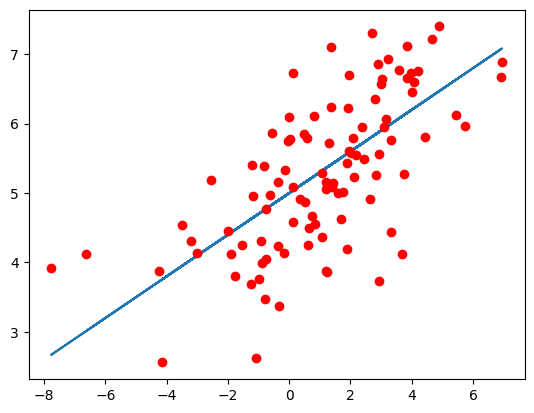

In [16]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [12]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.445763,5.181348,5.133729,0.087369,0.002268,0.061486
1,1.922469,6.190295,5.576741,0.021735,0.376449,0.579095
2,0.756439,6.325118,5.226932,0.040958,1.206014,0.802469
3,1.758071,5.847538,5.527421,0.009625,0.102475,0.174913
4,-1.579013,3.990324,4.526296,0.815438,0.287266,2.070686


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

54.71008384758909

In [16]:
SSD

51.43951939725788

In [17]:
SST

101.21039999385397

In [18]:
SSR+SSD

106.14960324484697

In [19]:
R2 = SSR/SST

In [20]:
R2

0.5405579253803104

(array([ 3.,  9.,  9., 13., 22., 10., 15., 10.,  3.,  6.]),
 array([-1.57615518, -1.25722405, -0.93829292, -0.61936179, -0.30043067,
         0.01850046,  0.33743159,  0.65636272,  0.97529385,  1.29422497,
         1.6131561 ]),
 <BarContainer object of 10 artists>)

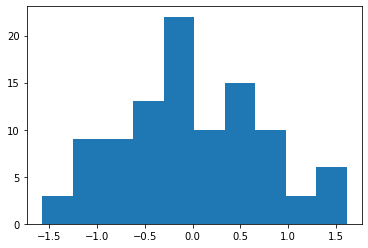

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.4295087271088212, 5.4293119653299815)

In [23]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(5.019817505840673, 0.28645817386334554)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.445763,5.181348,5.133729,0.087369,0.002268,0.061486,0.243934,0.967756,5.147510
1,1.922469,6.190295,5.576741,0.021735,0.376449,0.579095,0.375135,0.243010,5.570525
2,0.756439,6.325118,5.226932,0.040958,1.206014,0.802469,-0.602940,0.453023,5.236506
3,1.758071,5.847538,5.527421,0.009625,0.102475,0.174913,0.137413,0.107953,5.523431
4,-1.579013,3.990324,4.526296,0.815438,0.287266,2.070686,4.329227,9.051206,4.567496


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(49.88237713027072, 51.328022863583286, 101.210399993854)

In [31]:
R2 = SSR / SST
R2

0.49285821549267494

Text(0.5, 1.0, 'Valor Actual vs Predicción')

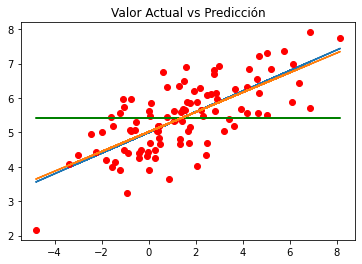

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7237094274242161

In [34]:
np.mean(data["y_actual"])

5.4293119653299815

In [35]:
RSE / np.mean(data["y_actual"])

0.13329671089921072